In [1]:
from tokenizers import Tokenizer
from transformers import PreTrainedTokenizerFast
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
SLICE_TOKENIZER_PATH = "/home/so87pot/n0w0f/regression-transformer/slice-assets/tokenizer/tokenizer-slice_396k.json"

In [3]:


class SliceTokenizer:
    def __init__(self, vocab_file=SLICE_TOKENIZER_PATH):
        _tokenizer = Tokenizer.from_file(vocab_file)
        self.tokenizer = PreTrainedTokenizerFast(
                    tokenizer_object=_tokenizer,
                    unk_token="[UNK]",
                    pad_token="[PAD]",
                    cls_token="[CLS]",
                    sep_token="[SEP]",
                    mask_token="[MASK]",
                )
    def tokenize(self, text):
        return self.tokenizer.tokenize(text)



def tokenize_save_and_plot(csv_path, txt_path, plot_path):
    tokenizer = SliceTokenizer(SLICE_TOKENIZER_PATH)
    token_counts = []
    with open(csv_path, "rt") as fp, open(txt_path, "w") as out_fp:
        for line in tqdm(fp):
            line = line.strip()
            tokens = tokenizer.tokenize(text=line)
            out_fp.write(line + '\n')  # write original line to file
            out_fp.write(' '.join(tokens) + '\n')  # write tokens to file
            out_fp.write(f"length:{len(tokens)}\n")  # write number of tokens to file
            out_fp.write("--------------\n")  # write separator to file
            token_counts.append(len(tokens))

    plt.hist(token_counts, bins='auto')
    plt.title('Token Count Distribution')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.savefig(plot_path)  # save the plot to a file
    plt.show()

    # Save distribution details to the file
    with open(txt_path, "a") as out_fp:
        out_fp.write("\nToken Count Distribution:\n")
        out_fp.write(f"Min: {min(token_counts)}\n")
        out_fp.write(f"Max: {max(token_counts)}\n")
        out_fp.write(f"Average: {sum(token_counts) / len(token_counts)}\n")

15143it [00:01, 7832.53it/s]


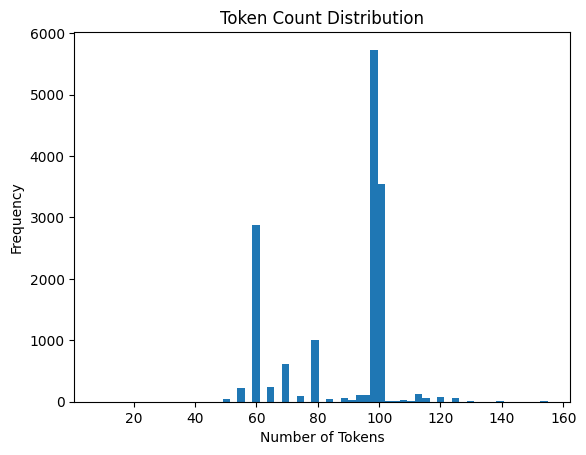

In [13]:
csv_path = "/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_perovskites_0.csv"

file_name = "ft_perovskites"
txt_path = f"/home/so87pot/n0w0f/structllm/results/{file_name}_tokens.txt"
plot_path = f"/home/so87pot/n0w0f/structllm/results/{file_name}_tokens.png"
tokenize_save_and_plot(csv_path, txt_path, plot_path)

In [ ]:
"/work/so87pot/structllm/matbench_data/csv/train_matbench_perovskites_0.csv"
"/work/so87pot/structllm/matbench_data/csv/train_matbench_log_gvrh_0.csv"
"/work/so87pot/structllm/matbench_data/csv/train_matbench_log_kvrh_0.csv"
"/work/so87pot/structllm/matbench_data/csv/train_matbench_dielectric_0.csv"

In [ ]:
'''
"/home/so87pot/n0w0f/structllm/data/396k/slice/train.csv"
/home/so87pot/n0w0f/structllm/data/27k/train.csv
/home/so87pot/n0w0f/structllm/data/130k/train.csv
/work/so87pot/material_db/scaleup/clean_2m.csv

/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_log_gvrh_0.csv
/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_log_kvrh_0.csv
/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_perovskites_0.csv
/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_dielectric_0.csv
/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_mp_gap_0.csv


'''